In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import h5py

In [4]:
m0 = 0.292 * (1380. / 2048) ** 3 * 27.75e10

In [5]:
def massfunction(mass, nbins):
    bins = linspace(12, 15, nbins, endpoint=True)
    n, v = histogram(log10(mass), bins=bins)
    n = n / diff(bins)
    n = n / 1380. **3.0
    bc = (bins[1:] + bins[:-1]) * 0.5
    return bc, n
    

In [6]:
f = h5py.File('40steps-x1/fof00100_0.200_1.0000.hdf5', 'r')
mfx1 = massfunction(f['FOFGroups']['Length'] * m0, 40)
f = h5py.File('40steps-x2/fof00100_0.200_1.0000.hdf5', 'r')
mfx2 = massfunction(f['FOFGroups']['Length'] * m0, 40)
f = h5py.File('40steps-xv/fof00100_0.200_1.0000.hdf5', 'r')
mfxv = massfunction(f['FOFGroups']['Length'] * m0, 40)
f = h5py.File('40steps-pm/fof00100_0.200_1.0000.hdf5', 'r')
mfx3 = massfunction(f['FOFGroups']['Length'] * m0, 40)
f = h5py.File('PB00/fof_0.200_1.0000.hdf5', 'r')
mfxx = massfunction(f['FOFGroups']['Length'] * m0, 40)
f = h5py.File('40steps-xV/fof00100_0.200_1.0000.hdf5', 'r')
mfxV = massfunction(f['FOFGroups']['Length'] * m0, 40)
f = h5py.File('10steps-cola/fof00100_0.200_1.0000.hdf5', 'r')
mfc10 = massfunction(f['FOFGroups']['Length'] * m0, 40)
f = h5py.File('10steps-pm/fof00100_0.200_1.0000.hdf5', 'r')
mfpm10 = massfunction(f['FOFGroups']['Length'] * m0, 40)
f = h5py.File('10steps-x2/fof00100_0.200_1.0000.hdf5', 'r')
mfpm10x2 = massfunction(f['FOFGroups']['Length'] * m0, 40)
f = h5py.File('10steps-c2/fof00100_0.200_1.0000.hdf5', 'r')
mfc10x2 = massfunction(f['FOFGroups']['Length'] * m0, 40)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


In [7]:
f = h5py.File('20steps-pm/fof00100_0.200_1.0000.hdf5', 'r')
mfpm20 = massfunction(f['FOFGroups']['Length'] * m0, 40)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


In [21]:
f = h5py.File('40steps-cola/fof00100_0.200_1.0000.hdf5', 'r')
mfc = massfunction(f['FOFGroups']['Length'] * m0, 40)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


In [15]:
f = h5py.File('5steps-cola/fof00100_0.200_1.0000.hdf5', 'r')
mfc5 = massfunction(f['FOFGroups']['Length'] * m0, 40)


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


In [10]:
f = h5py.File('5steps-x2/fof00100_0.200_1.0000.hdf5', 'r')
mfpm5x2 = massfunction(f['FOFGroups']['Length'] * m0, 40)
f = h5py.File('5steps-pm/fof00100_0.200_1.0000.hdf5', 'r')
mfpm5 = massfunction(f['FOFGroups']['Length'] * m0, 40)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


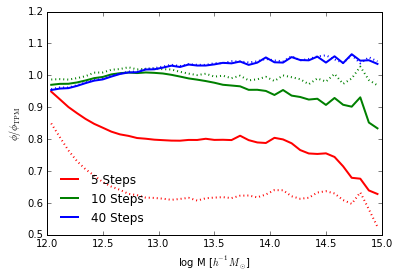

In [59]:
figure()

plot(mfpm5[0], mfpm5[1] / mfxx[1], lw=2, ls='-', label='5 Steps', color='r')
plot(mfc5[0], mfc5[1] / mfxx[1], lw=2, ls=':', color='r')
plot(mfpm10[0], mfpm10[1] / mfxx[1], lw=2, ls='-', label='10 Steps', color='g')
plot(mfc10[0], mfc10[1] / mfxx[1], lw=2, ls=':', color='g')
plot(mfx3[0], mfx3[1] / mfxx[1], lw=2, ls='-', label='40 Steps', color='b')
plot(mfc[0], mfc[1] / mfxx[1], lw=2, ls=':', color='b')


#axhline(1.0, ls=':', color='k')
legend(loc='lower left', frameon=False,)
ylim(0.5, 1.2)
xlabel(r'log M [$h^{-1} M_\odot$]')
ylabel(r'$\phi/\phi_\mathrm{TPM}$')
savefig('Mass-function.png', dpi=300)


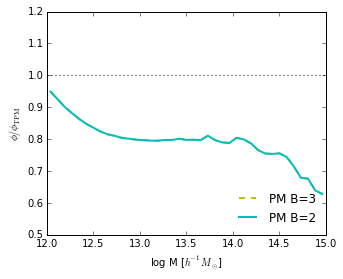

In [41]:
figure()

plot(mfpm5[0], mfpm5[1] / mfxx[1], lw=2, ls='--', label='PM B=3', color='y')
plot(mfpm5x2[0], mfpm5x2[1] / mfxx[1], lw=2, ls='-', label='PM B=2', color='c')
#plot(mfc[0], mfc[1] / mfxx[1], ls='-', lw=2, label='COLA 40 steps', color='k')
#plot(mfx3[0], mfx3[1] / mfxx[1], ls='--', lw=2, label='PM 40 steps', color='gray')
axhline(1.0, ls=':', color='k')
legend(loc='lower right', frameon=False,)
ylim(0.5, 1.2)
xlabel(r'log M [$h^{-1} M_\odot$]')
ylabel(r'$\phi/\phi_\mathrm{TPM}$')
savefig('Mass-function-5.png', dpi=300)


In [56]:
figure()
plot(mfx1[0], mfx1[1] / mfxx[1], lw=2, ls='--', label='B=1', color='b')
plot(mfx2[0], mfx2[1] / mfxx[1], lw=2, ls='-', label='B=2', color='g')
#plot(mfpm10[0], mfpm10[1] / mfxx[1], lw=2, ls='-', label='10', color='g')
#plot(mfxv[0], mfxv[1] / mfxx[1], lw=2, ls='-', label='B=1,2,3', color='c')
plot(mfx3[0], mfx3[1] / mfxx[1], lw=2, ls='-', label='B=3', color='r')
plot(mfxV[0], mfxV[1] / mfxx[1], lw=2, ls='--', label='B=1,2', color='purple')
#plot(mfc10[0], mfc10[1] / mfxx[1], lw=2, ls='-', label='B=3 COLA(10 steps)', color='gray')
#plot(mfc10x2[0], mfc10x2[1] / mfxx[1], lw=2, ls='-', label='B=2 COLA(10 steps)', color='c')
axhline(1.0, ls=':', color='k')
legend(loc='lower right', frameon=False,)
ylim(0.5, 1.2)
xlabel(r'log M [$h^{-1} M_\odot$]')
ylabel(r'$\phi/\phi_\mathrm{TPM}$')
savefig('Mass-function-b.png', dpi=300)

In [57]:
figure()

plot(mfpm10[0], mfpm10[1] / mfxx[1], lw=2, ls='-', label='B=3', color='y')
plot(mfpm10x2[0], mfpm10x2[1] / mfxx[1], lw=2, ls='-', label='B=2', color='c')
plot(mfc10[0], mfc10[1] / mfxx[1], lw=2, ls=':',  color='b')
plot(mfc10x2[0], mfc10x2[1] / mfxx[1], lw=2, ls=':', color='g')
plot(mfx1[0], mfx1[1] / mfxx[1], lw=2, ls='-', label='B=1', color='gray')
#plot(mfc[0], mfc[1] / mfxx[1], ls='-', lw=2, label='COLA 40 steps', color='k')
#plot(mfx3[0], mfx3[1] / mfxx[1], ls='--', lw=2, label='PM 40 steps', color='gray')
#axhline(1.0, ls=':', color='k')
legend(loc='lower right', frameon=False,)
ylim(0.5, 1.2)
xlabel(r'log M [$h^{-1} M_\odot$]')
ylabel(r'$\phi/\phi_\mathrm{TPM}$')
savefig('Mass-function-10.png', dpi=300)

In [23]:
txv = 1401.11
txV = 542.71
tx1 = 255.41
tx3 = 2265.85
tx2 = 786.52
tc10 = 608.24
t5x2 = 123.00
t5x3 = 221.00
tc10x2 = 231.34
t2lpt = 31.7

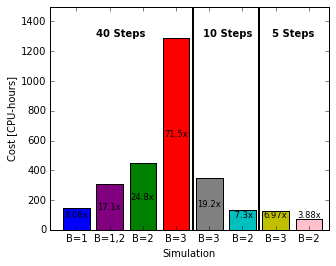

In [31]:
def autolabel(rects):
    ax= gca()
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        vheight = height
        if vheight < 200: vheight=200
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*vheight,
                '%4.3gx' % (height / (t2lpt * 2048 / 3600)),
                ha='center', va='center', rotation=0, 
                fontsize='small',
                bbox=dict(facecolor='none', edgecolor='none'))
        
figure(figsize=(5, 4))
colors = [
    #('white', t2lpt, '2LPT'),
 ('b', tx1, 'B=1'),
 ('purple', txV, 'B=1,2'),

 ('g', tx2, 'B=2'),
 ('r', tx3, 'B=3'),
 ('gray', tc10, 'B=3'),
 ('c', tc10x2, 'B=2'),
('y', t5x3, 'B=3'),
    ('pink', t5x2, 'B=2'),
]

x = arange(len(colors))
c = [i[0] for i in colors]
d = array([i[1] for i in colors]) * 2048 / 3600.
n = [i[2] for i in colors]
r = bar(x, d, color=c)
xticks(x+0.4, n)

axvline(3.9, color='k', lw=2)
#axvline(0.9, color='k', lw=2)
#axvspan(-0.4, 3.9, color='gray', alpha=0.2)
axvline(5.9, color='k', lw=2)
text(1.0, 1300, '40 Steps', ha='left', fontweight='bold')
text(4.2, 1300, '10 Steps', ha='left',  fontweight='bold')
text(6.3, 1300, '5 Steps', ha='left',  fontweight='bold')
#text(0.2, 1300, '1 Step', ha='center',  fontweight='bold')
xlabel('Simulation')
ylabel('Cost [CPU-hours]')
#grid(axis='y')
#twinx()
ylim(0, 1500)
xlim(-0.4, x.max()+1)
autolabel(r)
savefig('wallclocktime.png', dpi=300)

In [31]:
px1 = loadtxt('40steps-x1/powerspec00100_1.0000.txt', unpack=True)
px2 = loadtxt('40steps-x2/powerspec00100_1.0000.txt', unpack=True)
pxv = loadtxt('40steps-xv/powerspec00100_1.0000.txt', unpack=True)
pxV = loadtxt('40steps-xV/powerspec00100_1.0000.txt', unpack=True)
px3 = loadtxt('40steps-pm/powerspec00100_1.0000.txt', unpack=True)
p10steps = loadtxt('10steps-cola/powerspec00100_1.0000.txt', unpack=True)
p10stepspm = loadtxt('10steps-pm/powerspec00100_1.0000.txt', unpack=True)
p20stepspm = loadtxt('20steps-pm/powerspec00100_1.0000.txt', unpack=True)
p10stepspmx2 = loadtxt('10steps-x2/powerspec00100_1.0000.txt', unpack=True)
p10stepsx2 = loadtxt('10steps-c2/powerspec00100_1.0000.txt', unpack=True)
p5steps = loadtxt('5steps-pm/powerspec00100_1.0000.txt', unpack=True)
pc = loadtxt('40steps-cola/powerspec00100_1.0000.txt', unpack=True)
ptpm = loadtxt('PB00/power1d_PB00_mm_1.0000.txt', unpack=True)

In [37]:
figure(figsize=(5, 4))
Cut = (px1[0] < 1.0).nonzero()[0][-1]
Cut = slice(0, Cut)
plot(px1[0][Cut], p10stepspmx2[1][Cut] / ptpm[1][Cut], ls='-', lw=2, label='PM B=2', color='c')
plot(px1[0][Cut], p10stepspm[1][Cut] / ptpm[1][Cut], ls='--', lw=2, label='PM B=3', color='y')
plot(px1[0][Cut], p10stepsx2[1][Cut] / ptpm[1][Cut], ls='-', lw=2, label='Cola B=2', color='g')
plot(px1[0][Cut], p10steps[1][Cut] / ptpm[1][Cut], ls='--', lw=2, label='Cola B=3', color='b')
plot(px1[0][Cut], p5steps[1][Cut] / ptpm[1][Cut], ls='--', lw=2, label='5steps', color='gray')
plot(px1[0][Cut], pc[1][Cut] / ptpm[1][Cut], ls='-', lw=2, label='40 steps', color='k')
#plot(px1[0][Cut], px3[1][Cut] / ptpm[1][Cut], ls='--', lw=2, label='40 steps', color='gray')


axhline(1.0, ls=':', color='k')
xlabel(r'$k$ Mpc/h')
#plot(px1[0][Cut], pc[1][Cut] / ptpm[1][Cut], label='Cola')
ylim(0.9, 1.02)
ylabel(r'$P_\mathrm{dm} / P_\mathrm{true}$')
#legend()
#ylim(0.9, 1.02)
savefig('powerspectrum-10.png', dpi=300)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: RuntimeWarning: divide by zero encountered in divide


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide


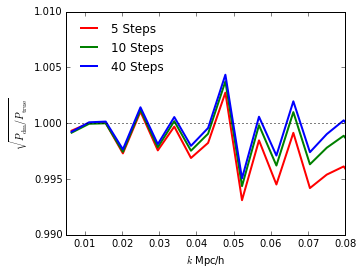

In [54]:
figure(figsize=(5, 4))
Cut = (px1[0] < 1.0).nonzero()[0][-1]
Cut = slice(0, Cut)
plot(px1[0][Cut], (p5steps[1][Cut] / ptpm[1][Cut]) ** 0.5, '-', lw=2, label='5 Steps', color='r')
plot(px1[0][Cut], (p10stepspm[1][Cut] / ptpm[1][Cut]) ** 0.5, '-', lw=2, label='10 Steps', color='g')
plot(px1[0][Cut], (px3[1][Cut] / ptpm[1][Cut]) ** 0.5, '-', lw=2, label='40 Steps', color='b')

#plot(px1[0][Cut], pxv[1][Cut] / ptpm[1][Cut], ls='-', lw=2, label='B=1,2,3', color='c')
#plot(px1[0][Cut], p20stepspm[1][Cut] / ptpm[1][Cut], ls='--', lw=2, label='20 Steps', color='purple')
#plot(px1[0][Cut], p20stepspm[1][Cut] / ptpm[1][Cut], ls='--', lw=2, label='20', color='purple')
#plot(px1[0][Cut], p10steps[1][Cut] / ptpm[1][Cut], ls='-', lw=2, label='Cola B=3', color='gray')
#plot(px1[0][Cut], p10stepsx2[1][Cut] / ptpm[1][Cut], ls='-', lw=2, label='Cola B=2', color='c')
axhline(1.0, ls=':', color='k')
xlabel(r'$k$ Mpc/h')
#plot(px1[0][Cut], pc[1][Cut] / ptpm[1][Cut], label='Cola')
ylim(0.99, 1.01)
xlim(0.005, 0.08)
ylabel(r'$\sqrt{P_\mathrm{dm} / P_\mathrm{true}}$')
#legend()
legend(loc='upper left', frameon=False)
savefig('bbc.png', dpi=300)

In [24]:
print (log10(f['FOFGroups']['Length'] * m0) > 12.0).sum()

8787669


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


In [177]:
%%file f1f2.txt
1	146.38	40	2048
2	682.58	40	2048
3	1790.18	40	2048
2   310     20  2048
2   167     10  2048
3   579.55  10  2048

Overwriting f1f2.txt


In [179]:
B, T, Ns, Ng = loadtxt('f1f2.txt', unpack=True)
def model(B, Ng, f1, f2, Ns):
    return Ns * (f1 * log10((B * Ng)**3) * (B * Ng)**3 + f2 * Ng ** 3) / 1e9

from scipy.optimize import minimize
def cost(p):
    f1, f2 = p
    return abs(T - model(B, Ng, f1, f2, Ns)).sum()
fmin(cost, (0.015, 0.021))


Optimization terminated successfully.
         Current function value: 272.216289
         Iterations: 100
         Function evaluations: 194


array([ 0.01546852,  0.46336941])

In [181]:
print zip(T, model(B, Ng, 0.0154, 0.4637, Ns))

[(146.38, 211.89081784722748), (682.58000000000004, 618.07267584349802), (1790.1800000000001, 1783.069085478538), (310.0, 309.03633792174901), (167.0, 154.5181689608745), (579.54999999999995, 445.7672713696345)]
